<a href="https://colab.research.google.com/github/jeniferGoncalvesDaSilvaDev/aulas-ml-andrew-nig-coursera/blob/main/Fun%C3%A7%C3%A3o_de_custo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

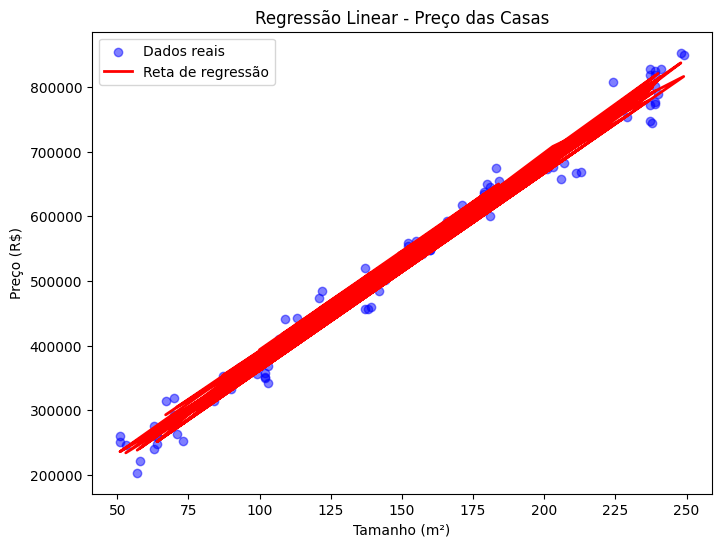

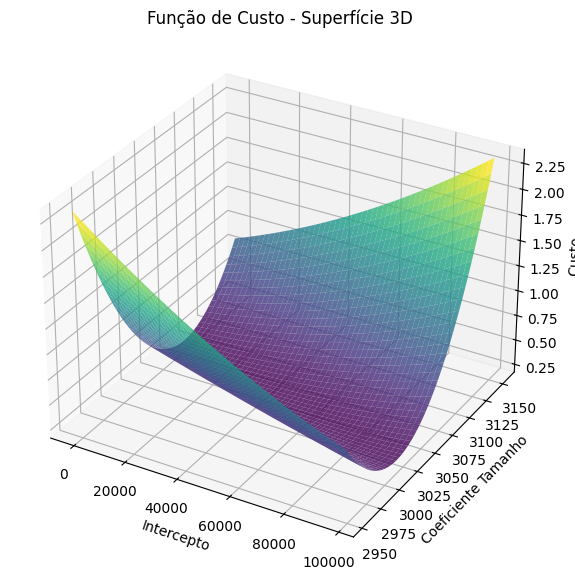

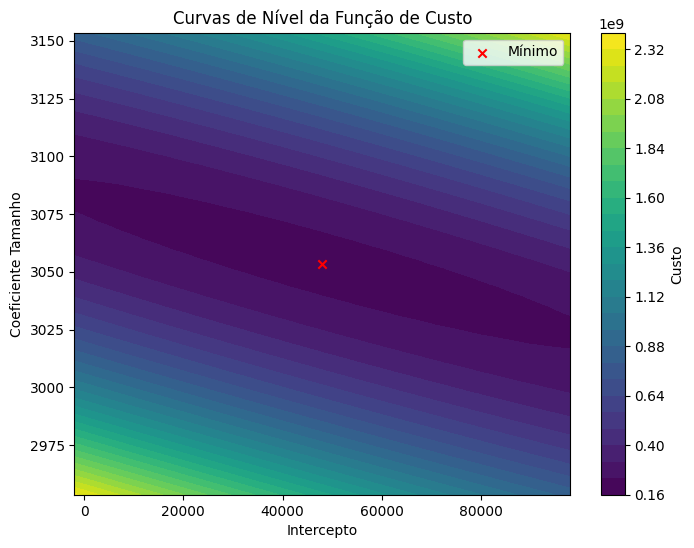

('precos_casas.csv', array([3053.51547977, 8045.3214475 ]), 48033.60783784476)

In [3]:


# Criando um dataset fictício de preços de casas
np.random.seed(42)
tamanho_m2 = np.random.randint(50, 250, 100)  # Tamanho da casa em m²
num_quartos = np.random.randint(1, 6, 100)  # Número de quartos
preco = 50000 + 3000 * tamanho_m2 + 10000 * num_quartos + np.random.normal(0, 20000, 100)  # Preço em reais

# Criando um DataFrame e salvando como CSV
df = pd.DataFrame({'Tamanho_m2': tamanho_m2, 'Num_Quartos': num_quartos, 'Preco': preco})
csv_path = "precos_casas.csv"
df.to_csv(csv_path, index=False)

# Aplicando regressão linear
X = df[['Tamanho_m2', 'Num_Quartos']]
y = df['Preco']
model = LinearRegression()
model.fit(X, y)

# Obtendo os parâmetros do modelo
coeficientes = model.coef_
intercepto = model.intercept_

# Visualização da reta de regressão no gráfico de dispersão (considerando apenas o tamanho para visualização)
plt.figure(figsize=(8, 6))
plt.scatter(df['Tamanho_m2'], df['Preco'], color='blue', label='Dados reais', alpha=0.5)
plt.plot(df['Tamanho_m2'], model.predict(X), color='red', linewidth=2, label='Reta de regressão')
plt.xlabel("Tamanho (m²)")
plt.ylabel("Preço (R$)")
plt.legend()
plt.title("Regressão Linear - Preço das Casas")
plt.show()

# Criando a função de custo J(theta) para visualização 3D
theta0_vals = np.linspace(intercepto - 50000, intercepto + 50000, 50)
theta1_vals = np.linspace(coeficientes[0] - 100, coeficientes[0] + 100, 50)
theta2_vals = np.linspace(coeficientes[1] - 1000, coeficientes[1] + 1000, 50)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Calculando a função de custo
m = len(y)
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta0 = theta0_vals[i]
        theta1 = theta1_vals[j]
        theta2 = coeficientes[1]  # Mantendo fixo para visualizar fatias
        h = theta0 + theta1 * X['Tamanho_m2'] + theta2 * X['Num_Quartos']
        J_vals[i, j] = (1 / (2 * m)) * np.sum((h - y) ** 2)

# Criando o gráfico 3D da função de custo
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(T0, T1, J_vals, cmap='viridis', alpha=0.8)
ax.set_xlabel("Intercepto")
ax.set_ylabel("Coeficiente Tamanho")
ax.set_zlabel("Custo")
ax.set_title("Função de Custo - Superfície 3D")
plt.show()

# Criando gráfico de contorno (fatias)
plt.figure(figsize=(8, 6))
plt.contourf(T0, T1, J_vals, cmap='viridis', levels=30)
plt.colorbar(label="Custo")
plt.scatter(intercepto, coeficientes[0], color='red', marker='x', label="Mínimo")
plt.xlabel("Intercepto")
plt.ylabel("Coeficiente Tamanho")
plt.title("Curvas de Nível da Função de Custo")
plt.legend()
plt.show()

# Retornando os parâmetros do modelo
csv_path, coeficientes, intercepto